### 1. 목표
- 500명의 키와 몸무게, 비만도 라벨을 이용해 비만을 판단하는 모델을 만들어보자
- 분류 문제

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
bmi = pd.read_csv('bmi_500.csv', index_col = 'Label')

In [6]:
bmi.head(2)

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87


In [7]:
# 전체 데이터 수, 결측치여부, 컬럼별 정보
bmi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


In [8]:
# 기술통계 확인
bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [11]:
# 어떤 클래스들이 있을까?
bmi.index.unique() #중복 없이 반환

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

### 3. 탐색적 데이터 분석(EDA)
- 각 비만도 등급별로 시각화(전처리는 건너뛴다)

In [13]:
# 비만도 등급이 'Normal'인 사람의 데이터만 가져오기
bmi.loc['Normal']

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67
...,...,...,...
Normal,Female,178,65
Normal,Male,167,64
Normal,Female,151,55


In [14]:
# 'Normal'인 사람의 키('Height') 데이터만
bmi.loc['Normal','Height']

Label
Normal    189
Normal    195
Normal    155
Normal    191
Normal    172
         ... 
Normal    178
Normal    167
Normal    151
Normal    187
Normal    164
Name: Height, Length: 69, dtype: int64

In [15]:
# 'Normal'인 사람의 키('Height'), 몸무게('Weight') 데이터만
bmi.loc['Normal',['Height','Weight']]

,Height,Weight
Label,,
Normal,189,87
Normal,195,81
Normal,155,51
Normal,191,79
Normal,172,67
...,...,...
Normal,178,65
Normal,167,64
Normal,151,55


In [16]:
# 'Normal', 'Obesity' 사람의 키('Height'), 몸무게('Weight') 데이터만
bmi.loc[['Normal', 'Obesity'], ['Height','Weight']]

,Height,Weight
Label,,
Normal,189,87
Normal,195,81
Normal,155,51
Normal,191,79
Normal,172,67
...,...,...
Obesity,146,85
Obesity,188,115
Obesity,173,111


In [18]:
def myScatter(label, color):
    tmp = bmi.loc[label]
    plt.scatter(tmp['Weight'], tmp['Height'], c=color, label=label)

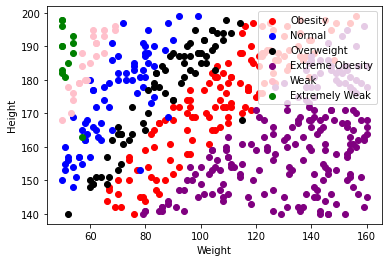

In [22]:
myScatter('Obesity', 'red')
myScatter('Normal', 'blue')
myScatter('Overweight', 'black')
myScatter('Extreme Obesity', 'purple')
myScatter('Weak', 'pink')
myScatter('Extremely Weak', 'green')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend(loc='upper right')
plt.show()

### 모델링
1. 문제와 답으로 분리
2. train(훈련셋)과 test(평가셋) 분리
3. 모델생성 및 하이퍼파라미터 조정
4. 학습 및 평가

In [25]:
# 인덱스 리셋
bmi.reset_index(inplace=True)

In [29]:
bmi

,Label,Gender,Height,Weight
0,Obesity,Male,174,96
1,Normal,Male,189,87
2,Obesity,Female,185,110
3,Overweight,Female,195,104
4,Overweight,Male,149,61
...,...,...,...,...
495,Extreme Obesity,Female,150,153
496,Obesity,Female,184,121
497,Extreme Obesity,Female,141,136
498,Extreme Obesity,Male,150,95


In [30]:
# df[ 열 ]
# df.loc[ 행, 열 ]
# df.loc[ 행 ]

,Label,Gender,Height,Weight
0,Obesity,Male,174,96
1,Normal,Male,189,87
2,Obesity,Female,185,110
3,Overweight,Female,195,104
4,Overweight,Male,149,61
...,...,...,...,...
495,Extreme Obesity,Female,150,153
496,Obesity,Female,184,121
497,Extreme Obesity,Female,141,136
498,Extreme Obesity,Male,150,95


In [31]:
bmi

,Label,Gender,Height,Weight
0,Obesity,Male,174,96
1,Normal,Male,189,87
2,Obesity,Female,185,110
3,Overweight,Female,195,104
4,Overweight,Male,149,61
...,...,...,...,...
495,Extreme Obesity,Female,150,153
496,Obesity,Female,184,121
497,Extreme Obesity,Female,141,136
498,Extreme Obesity,Male,150,95


In [34]:
x= bmi[ ['Height', 'Weight']]  # 키, 몸무게
y= bmi['Label']  # 라벨

In [38]:
# 2. train(훈련셋)과 test(평가셋)분리
# 훈련(train)과 평가(test) 비율은 7:3으로 나눠준다
X_train = x.iloc[:350]
X_test = x.iloc[350:]
Y_train = y.iloc[:350]
Y_test = y.iloc[350:]

In [39]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(350, 2)
(150, 2)
(350,)
(150,)


In [40]:
# 3. 모델 생성 및 하이퍼파라미터 조정
from sklearn.neighbors import KNeighborsClassifier

In [53]:
# KNN 모델 생성
Knn_model = KNeighborsClassifier(n_neighbors=10) # 하이퍼파라미터 조정

In [54]:
# 4. 학습 및 평가
# 모델 학습 - fit()
Knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [55]:
# 예측 - predict()
pre = Knn_model.predict(X_test)

In [56]:
Y_test # -> 이게 실제 답

350             Normal
351             Normal
352             Normal
353    Extreme Obesity
354     Extremely Weak
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Label, Length: 150, dtype: object

In [57]:
# 평가를 위한 모듈
from sklearn import metrics

In [58]:
# 평가
metrics.accuracy_score(pre, Y_test)
# 하이퍼파라미터 조정 후 90.6 -> 94로 바뀜

0.94

# 활용하기

In [59]:
Knn_model.predict([[163, 80]])

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Obesity'], dtype=object)